# The lyricsgenius library from https://github.com/johnwmillr/LyricsGenius is used to scrape genius.com for song lyrics

In [ ]:
import pandas as pd
import lyricsgenius as genius
#from bs4 import BeautifulSoup
import nltk
import numpy as np
from string import punctuation
from nltk.probability import FreqDist
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#import json
from nltk.corpus import stopwords

In [7]:

api = genius.Genius('ekJs8RoT6EPbhhywrEFY0wRiE86HV2G0jyG9JSVymn2uAeu22tToSAsgfs7hibFL')
artist = api.search_artist('Playboi Carti', max_songs=50)
artist.save_lyrics() #writes lyrics to a json named after the artist
#(e.g. 'Lyrics_SnoopDogg.json')


Searching for songs by Playboi Carti...

Song 1: "10kk A Couple Thousand$ For The Hoe$"
Song 2: "36 Villainz"
Song 3: "3 Chains"
Song 4: "400 Degrees"
Song 5: "4Tspoon"
Song 6: "A Lot On My Mind*"
Song 7: "Arm N Leg"
Song 8: "AR Whip"
Song 9: "Asthma*"
Song 10: "Bags"
Song 11: "Beef"
Song 12: "Been Ballin"
Song 13: "Black N White"
Song 14: "Blue Crystal$"
Song 15: "Broke Boi"
Song 16: "Buffy The Body*"
Song 17: "Bust Down"
Song 18: "Butterfly Coupe"
Song 19: "By Myself / No Help"
Song 20: "Call Up The Troops"
Song 21: "Cancún"
Song 22: "Carolina Blue"
Song 23: "Cash Shit"
Song 24: "Chill Freestyle"
Song 25: "Choppa Won't Miss"
Song 26: "Clouted Up"
Song 27: "Club Pink"
Song 28: "Count It Up"
Song 29: "Cry"
Song 30: "Damn Shame"
Song 31: "DC2"
Song 32: "Die Like This*"
Song 33: "Dog Food"
Song 34: "Don't Tell Nobody"
Song 35: "​dothatshit!"
Song 36: "Drip"
Song 37: "Drop"
Song 38: "Early"
Song 39: "Every Since"
Song 40: "Evil"

Reached user-specified song limit (40).
Found 40 songs.
Don

{'songs': [{'title': '10kk A Couple Thousand$ For The Hoe$',
   'album': None,
   'year': None,
   'lyrics': "[Intro:]\nCartier\nSir Cartier\n\n[Verse 1:]\nSlowed up, I'm fucked up\nOff that two cup sensation\nI'm racing, in my mind (skrt)\nTokyo drift, aye Tokyo pimp\nI'm talking to steez, I'm talking to limp\nThese hoes on my dick\nSnort white powder, clam chowder with the bitch\n(Gotcha bitch)\nMade my block proud but I still can't trust em\nGotcha baby mama on hold like fuck it\nLet me take a stroll told my home boy to tuck it\nSeen a pussy nigga then my niggas started bustin\n(Gunshots)\n\n[Chorus:]\nAye, Monkeys on my draws\nShe think i'm the man\n10 for a verse, I don't say nothing\nSmokin' on this kush, word to my man\nSplurt on my swag, shout out to Japan (Carti)\n\n[Verse 2:]\nPimp game I got pimp game\nWatch me switch lanes in that new thing\nGot a bopper bitch wit a pussy ring\nShe like to hold the work for Yung Carti\nI just throw it all in my apartment\nThirsty bitch be q

In [ ]:
southlist = open('southlist.txt')

for line in southlist:
    api = genius.Genius('ekJs8RoT6EPbhhywrEFY0wRiE86HV2G0jyG9JSVymn2uAeu22tToSAsgfs7hibFL')
    artist = api.search_artist(line, max_songs=50)
    artist.save_lyrics() #writes lyrics to a json named after the artist

southlist.close()

# The lyrics of each artist are loaded into their own dataframes

In [8]:
#this code block creates a pandas dataframe containing song names and their lyrics

rawlyrics= pd.read_json('westcoast\Lyrics_PlayboiCarti.json')
songs = rawlyrics.get('songs')
lyric_df = pd.DataFrame(columns=['name','lyrics'])

for x in songs:
    lyric_df = lyric_df.append({
        'name': x.get('title'),
        'lyrics': x.get('lyrics')
    }, ignore_index=True)
lyric_df.head(10)

,name,lyrics
0,10kk A Couple Thousand$ For The Hoe$,[Intro:]\nCartier\nSir Cartier\n\n[Verse 1:]\n...
1,36 Villainz,[Intro: Playboi Carti]\nYou'd be very foolish ...
2,3 Chains,"[Intro: Playboi Carti]\nI got 3 chains on, 3 c..."
3,400 Degrees,"[Chorus: Playboi Carti]\nMoney got longer, i f..."
4,4Tspoon,"[Intro: Yung Bans]\n25,8,6,7,8, (Bans)\nI just..."
5,A Lot On My Mind*,Lyrics from Snippet\n\n[Chorus]\nI got a lot o...
6,Arm N Leg,[Chorus]\nI need an arm and leg\nI need an arm...
7,AR Whip,[Intro- Lil Uzi Vert]\nDat Be Maaly Raw\n\n[Ho...
8,Asthma*,Lyrics from Snippet\n\n[Verse]\nBad bitches wa...
9,Bags,"[Verse]\nI got all these bags (ouu, yuh)\nI go..."


In [9]:
#creates a string containing the lyrics of every song in the lyrics dataframe
lyrics = ''.join(lyric_df.lyrics)
#removes punctuation

removal_string = string.punctuation+("""’""") #genius.com uses a special ’ character
transtable = str.maketrans('','',removal_string)
lyrics_punct = lyrics.translate(transtable)

# Tokenize lyrics and generate a frequency distribution object using the Natural Languange Toolkit

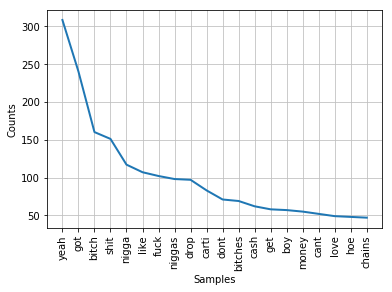

FreqDist({'yeah': 308, 'got': 240, 'bitch': 160, 'shit': 151, 'nigga': 117, 'like': 107, 'fuck': 102, 'niggas': 98, 'drop': 97, 'carti': 83, ...})

In [10]:
#tokenizes string and finds frequency of each word (counts punctuation as a word)
 
stop_words = stopwords.words('english')
#the two most common contractions that aren't in stopwords.words,
#as well as words used to denote the sections of a song
stop_words.extend(['im','ill','verse','hook','chorus','bridge']) 
stop_words = set(stop_words) #element removal is faster using set than list

word_tokens = nltk.word_tokenize(lyrics_punct) 
word_tokens = [w.lower() for w in word_tokens]

filtered_tokens = [w for w in word_tokens if w not in stop_words] 
#print(filtered_tokens)

fd = FreqDist(filtered_tokens)

fd.plot(20, cumulative = False)
fd

# All the code above placed in a function called "lyricfreq" that takes the argument "region".
# "region" is the directory (as a string) where the lyrics are saved 

In [6]:
def lyricfreq(region):

	from os import listdir
	import pandas as pd
	import nltk
	import string
	from string import punctuation
	from nltk.corpus import stopwords
	from nltk.probability import FreqDist

	lyric_df = pd.DataFrame(columns=['name','lyrics'])


	for lyricfile in listdir(region):
	    lyricfile = (region)+(lyricfile)
	    #print(lyricfile)
	    rawlyrics= pd.read_json(lyricfile)
	    songs = rawlyrics.get('songs')
	    
	    for x in songs:
	        lyric_df = lyric_df.append({
	            'name': x.get('title'),
	            'lyrics': x.get('lyrics')
	        }, ignore_index=True)
	    
	#lyric_df.shape




	#creates a string containing the lyrics of every song in the lyrics dataframe
	lyrics = ''.join(lyric_df.lyrics)
	#removes punctuation

	removal_string = string.punctuation+("""’""") #genius.com uses a special ’ character
	transtable = str.maketrans('','',removal_string)
	lyrics_punct = lyrics.translate(transtable)



	#tokenizes string and finds frequency of each word (counts punctuation as a word)
	 
	stop_words = stopwords.words('english')
	#the two most common contractions that aren't in stopwords.words,
	#as well as words used to denote the sections of a song
	stop_words.extend(['im','ill','verse','hook','chorus','bridge']) 
	stop_words = set(stop_words) #element removal is faster using set than list

	word_tokens = nltk.word_tokenize(lyrics_punct) 
	word_tokens = [w.lower() for w in word_tokens]

	filtered_tokens = [w for w in word_tokens if w not in stop_words] 
	#print(filtered_tokens)

	fd = FreqDist(filtered_tokens)

	fd.plot(20, cumulative = False)
	return fd

# Now the data will be used to train a neural network

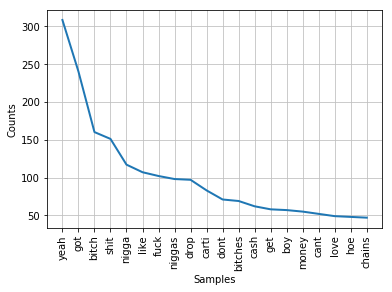

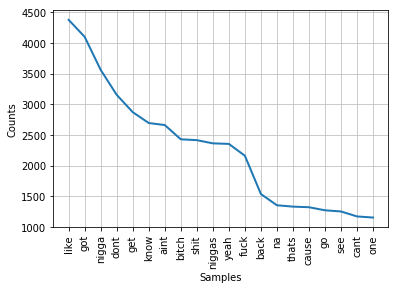

In [7]:
east_xtr = lyricfreq('eastcoast\\')
west_xtr = lyricfreq('westcoast\\')

In [9]:
east_xtr.keys()

dict_keys(['intro', 'cartier', 'sir', '1', 'slowed', 'fucked', 'two', 'cup', 'sensation', 'racing', 'mind', 'skrt', 'tokyo', 'drift', 'aye', 'pimp', 'talking', 'steez', 'limp', 'hoes', 'dick', 'snort', 'white', 'powder', 'clam', 'chowder', 'bitch', 'gotcha', 'made', 'block', 'proud', 'still', 'cant', 'trust', 'em', 'baby', 'mama', 'hold', 'like', 'fuck', 'let', 'take', 'stroll', 'told', 'home', 'boy', 'tuck', 'seen', 'pussy', 'nigga', 'niggas', 'started', 'bustin', 'gunshots', 'monkeys', 'draws', 'think', 'man', '10', 'dont', 'say', 'nothing', 'smokin', 'kush', 'word', 'splurt', 'swag', 'shout', 'japan', 'carti', '2', 'game', 'got', 'watch', 'switch', 'lanes', 'new', 'thing', 'bopper', 'wit', 'ring', 'work', 'yung', 'throw', 'apartment', 'thirsty', 'quiet', 'x2', 'tryna', 'mad', 'cuz', 'gave', 'yo', 'molly', 'aint', 'spot', 'guap', 'stacks', 'back', 'hit', 'brain', 'leave', 'clueless', 'real', 'rudest', 'shooter', 'thats', 'hoe', 'yeah', 'know', 'every', 'go', 'rich', 'low', 'ever', 's